# Agentpy Workshop

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JoelForamitti/agentpy_workshop/HEAD)
[![Documentation](https://img.shields.io/badge/read_the-documentation-red?logo=read-the-docs)](https://agentpy.readthedocs.io/en/latest/)
[![GitHub](https://img.shields.io/badge/edit_on-GitHub-blueviolet?logo=github)](https://img.shields.io/github/license/JoelForamitti/agentpy_workshop)

This interactive notebook will guide you through the development of an agent-based model with the [agentpy](https://agentpy.readthedocs.io) package. 
To run this workshop in a virtual environment, you can launch this notebook in [binder]([![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/JoelForamitti/agentpy_workshop/HEAD)).

## 1. Introduction

**Agent-based models** (ABMs) are computer simulations to generate and understand the dynamics of [complex systems](https://complexityexplained.github.io/) based on the autonomous behavior of heterogeneous agents. They show how the behavior of a system as a whole can emerge out of the actions and interactions of individual agents, each with their own set of rules, characteristics, and information. This method has found numerous applications in fields like [ecology](https://doi.org/10.3389/fevo.2018.00237), [cognitive sciences](https://doi.org/10.1177/0963721419834547), [management](https://oxford.universitypressscholarship.com/view/10.1093/acprof:oso/9780195172119.001.0001/acprof-9780195172119), 
[economics](https://www.nature.com/articles/460685a), and [sociology](https://doi.org/10.1002/wics.1356).

**Agentpy** is an open-source library for the development and analysis of agent-based models in Python. The framework integrates the tasks of model design, numerical experiments, and data analysis within a single environment, and is optimized for interactive computing with [IPython](http://ipython.org/) and [Jupyter](https://jupyter.org/). If you have questions or ideas for improvements, please visit the [discussion forum](https://github.com/JoelForamitti/agentpy/discussions)
or subscribe to the [agentpy mailing list](https://groups.google.com/g/agentpy).

Within this framework, **agents** are represented as [objects](https://www.programiz.com/python-programming/class) that can be placed within different **environments** like a network or a spatial grid. A **model** is used to initiate these objects, perform a simulation, and record data. **Experiments** can take a model and run it over multiple iterations with different parameter combinations. The resulting **output** data can be saved, loaded, and re-arranged for analysis and visualization.

<img src="structure.png" alt="drawing" width="500"/>

**This workshop** will introduce you to the basic syntax of the agentpy package. Some basic knowledge of Python is required, but it is generally aimed at beginners. The following sections will show you how to design custom agents and models; use networks; visualize the dynamics of a simulation in an animation, perform experiments that run a model multiple times with different parameterts; and run a sensitivity analysis on the output data. For more information about agentpy, check out the [documentation](https://agentpy.readthedocs.io/) and [model library](https://agentpy.readthedocs.io/en/latest/model_library.html). 

## 2. Basic Syntax
### Let's get started

To begin, let us understand Jupyter Notebooks. Below you can see the first *code cell* of this notebook, which you can edit yourself. You can navigate between cells with your keyboard arrows or by clicking on a cell. To *run* the selected cell, click on the `►` button at the top or use the keyboard combination `Shift` + `Enter`. For more information about Jupyter, [click here](https://realpython.com/jupyter-notebook-introduction/).

In [1]:
print('Hello World!')

Hello World!


For this workshop, we have to install the required packages `agentpy` and `seaborn`. On binder, this has already happened automatically. If you are running this workshop on your local machine, you can use the following command:

In [2]:
# !pip install -r requirements.txt 

We can now import the agentpy library as follows:

In [3]:
import agentpy as ap

### Creating custom agents

Let us first understand the basics of object-oriented programming. **Objects** are a collection of variables and methods. Every object further has a type, which refers to the class that has created the object. **Classes** can be seen as a *building instruction* for new objects. You can learn more about classes and objects [here](https://www.programiz.com/python-programming/class). 

To create an agent-based model in agentpy, we create a new instance of the class `ap.Model`:

In [4]:
model = ap.Model()

To fill this model with our custom agents, we need to create a custom class as a *child* of `ap.Agent`. This means that our custom agent will inherit all basic agent functionalities from its *parent* class.

The following code creates a custom class named `MyAgentType`. This class defines a method `setup` that will be called automatically when a new agent of this class is created.

In [5]:
class MyAgentType(ap.Agent):
    """ Description of my agent. """
    
    def setup(self):
        print(f"Agent {self.id} says 'Hello World!'")

To add three agents of this class to our model, we can use the following method:

In [6]:
agents = model.add_agents(3, MyAgentType)

Agent 1 says 'Hello World!'
Agent 2 says 'Hello World!'
Agent 3 says 'Hello World!'


Here are some commands to investigate the current state of our model:

In [7]:
model

Agent-based model {
'type': Model
'agents': AgentList [3 agents]
'envs': EnvList [0 environment]
'p': AttrDict {0 entries}
't': 0
'run_id': None
'scenario': None
'output': DataDict {1 entry}
}

In [8]:
model.agents

AgentList [3 agents]

In [9]:
model.agents.type

AttrList of attribute 'type': ['MyAgentType', 'MyAgentType', 'MyAgentType']

### Creating custom models

Let us now proceed to define a model capable of performing a simple simulation. For this, we have to create a custom model class, similar to how we created a custom agent. This model comes with two methods: 
 `setup`, which is called at the beginning of the simulation; and `step`, which will be called at every time-step of the simulation.

In [10]:
class MyModelType(ap.Model):
    """ Description of my model. """
    
    def setup(self):
        self.add_agents(self.p.agents, MyAgentType)  # Add new agents
        self.agents.x = 0  # Set a variable

    def step(self):
        self.agents.x += 1  # Manipulate a variable
        self.agents.record('x')  # Record a variable     

As we can see, this model will initiate some agents of our custom type and give them a variable `x` at the start of the simulation. Then, at every time-step, this variable will be increased by 1 and recorded.

The number of agents and steps is given by a dictionary of **parameters**, which have to be passed to the model when a new instance is created. Parameters can accessed by all model objects through `self.p`.

In [11]:
parameters = {'agents':3, 'steps':3}
model = MyModelType(parameters)

We can then use the function `model.run` to perform the simulation:

In [12]:
results = model.run()

Agent 1 says 'Hello World!'
Agent 2 says 'Hello World!'
Agent 3 says 'Hello World!'
Completed: 3 steps
Run time: 0:00:00.005790
Simulation finished


### Simulation results
We have successfully performed our first simulation!
We can now find the output data of this simulation in our variable `results`:

In [13]:
results

DataDict {
'log': Dictionary with 4 keys
'parameters': Dictionary with 2 keys
'variables': 
    'MyAgentType': DataFrame with 1 variable and 9 rows
}

Different sections of the results can be accessed like this:

In [14]:
results.variables.MyAgentType

x
obj_id t   
1      1  1
       2  2
       3  3
2      1  1
       2  2
       3  3
3      1  1
       2  2
       3  3

We can see that the model did what we wanted it to do. The data structure of this table is a **pandas dataframe**, which come with numerous functionalities for data manipulation and analysis. You can learn more about the pandas library [here](https://pandas.pydata.org/docs/getting_started/index.html).

### Exercises

Feel free experiment a bit with the code above. Here are some things you can try out:

- Initiate the variable `x` in `MyAgentType.setup()` instead of in `model.setup()`.
- Add another method to MyAgentType and use it `model.step()`.
- Add another parameter to the simulation and use it in the new method.
- Add another variable to `MyAgentType` and record it as well.
- Analyze the output data with the function [`pandas.DataFrame.mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

## 3. Creating Complex Models

Let us now move on to a more advanced exersize. 
We want to create an agent-based model that simulates the propagation of a disease through a network.
The agents of this model are people, which can be in one of the following three conditions: susceptible to the disease (S), infected (I), or recovered (R). The agents are connected to each other through a small-world network of peers. At every time-step, infected agents can infect their peers or recover from the disease based on random chance.

To start, we import all the necessary libraries:

In [15]:
# Model design
import agentpy as ap
import networkx as nx 
import random 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import IPython

### Defining the model

We define a new agent type `Person`:

In [16]:
class Person(ap.Agent):
    """ A person that can transmit a disease. """
    
    def setup(self):  
        """ Initialize a new variable at agent creation. """
        self.condition = 0  # Susceptible = 0, Infected = 1, Recovered = 2
        
    def being_sick(self):
        """ Spread disease to peers in the network. """
        for n in self.neighbors(): 
            if n.condition == 0 and self.p.infection_chance > random.random():
                n.condition = 1  # Infect susceptible peer
        if self.p.recovery_chance > random.random():
            self.condition = 2  # Recover from infection

Two new functions are used within this class:

- `Agent.neighbors()` returns a list of the agents' peers in the network
- `random.random()` returns a uniform random draw between 0 and 1

Next, we define a new model type `VirusModel`:

In [17]:
class VirusModel(ap.Model):
    
    def setup(self):
        """ Initialize the agents and network of the model. """
        
        # Prepare a small-world network
        graph = nx.watts_strogatz_graph(
            self.p.population, 
            self.p.number_of_neighbors, 
            self.p.network_randomness)
        
        # Create agents and network
        self.add_agents(self.p.population, Person)
        self.add_network(graph=graph, agents=self.agents)
        
        # Infect a random share of the population
        I0 = int(self.p.initial_infection_share * self.p.population)
        self.agents.random(I0).condition = 1 

    def update(self):  
        """ Record variables after setup and each step. """
        
        # Record share of agents with each condition
        for i, c in enumerate(('S', 'I', 'R')):
            n_agents = len(self.agents.select(self.agents.condition == i))
            self[c] = n_agents / self.p.population 
            self.record(c)
        
        # Stop simulation if disease is gone
        if self.I == 0:
            self.stop()
        
    def step(self):   
        """ Define the models' events per simulation step. """
        
        # Call 'being_sick' for infected agents
        self.agents.select(self.agents.condition == 1).being_sick()
    
    def end(self):     
        """ Record evaluation measures at the end of the simulation. """
        
        # Record final evaluation measures
        self.measure('Total share infected', self.I + self.R) 
        self.measure('Peak share infected', max(self.log['I']))

In addition to `setup` and `step`, two new kinds of methods are defined in this model:

- `update` is called automatically after both `setup` and `step`.
- `end` is called at the end of the simulation.

There are also some new functionalities that are used within these methods:

- `nx.watts_strogatz_graph` is a function from the networkx library to generate a network.
- `add_network` creates a new network environment in which agents can be placed.
- `select` can be used to select a set of agents from an `AgentList` based on a specific condition. 
- `random` can be used to select a random subset from an `AgentList`.
- `measure` saves an evaluation measure. These measures are saved seperately from objects' variables and can only be recorded once per simulation.
- `stop` is used to stop the simulation. This can be used instead of passing a parameter *steps*.
- `log` can be used to access recorded variables.

### Running a simulation

As before, we can now define our parameters and run the model:

In [18]:
parameters = {  
    'population': 1000,
    'infection_chance': 0.3,
    'recovery_chance': 0.1,
    'initial_infection_share': 0.1,
    'number_of_neighbors': 2,
    'network_randomness': 0.5   
}

model = VirusModel(parameters)
results = model.run() 

Completed: 98 steps
Run time: 0:00:00.206740
Simulation finished


### Analyzing results

To visualize the evolution of our variables over time, we create a stackplot function using the [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) libraries. You can learn more about stackplots [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html).

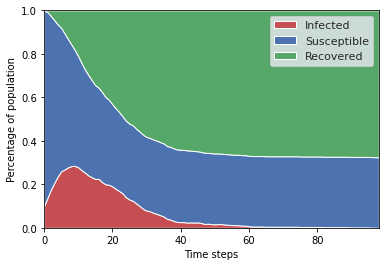

In [19]:
def virus_stackplot(data, ax):
    """ Stackplot of people's condition over time. """
    x = data.index.get_level_values('t')
    y = [data[var] for var in ['I', 'S', 'R']]
    
    sns.set()
    ax.stackplot(x, y, labels=['Infected', 'Susceptible', 'Recovered'],
                 colors = ['r', 'b', 'g'])    
    
    ax.legend()
    ax.set_xlim(0, max(1, len(x)-1))
    ax.set_ylim(0, 1)
    ax.set_xlabel("Time steps")
    ax.set_ylabel("Percentage of population")

fig, ax = plt.subplots()
virus_stackplot(results.variables, ax)

### Creating an animation

We can also animate the model's dynamics as follows.
The function `animation_plot` takes a model instance 
and displays the previous stackplot together with a network graph. 
The function `animate` will call this plot
function for every time-step and return an matplotlib animation object.

In [20]:
def animation_plot(m, axs):
    ax1, ax2 = axs
    ax1.set_title("Virus spread")
    ax2.set_title(f"Share infected: {m.I}")
    
    # Plot stackplot on first axis
    virus_stackplot(m.output.variables, ax1)
    
    # Plot network on second axis
    color_dict = {0:'b', 1:'r', 2:'g'}
    colors = [color_dict[c] for c in m.agents.condition]
    nx.draw_circular(m.env.graph, node_color=colors, 
                     node_size=50, ax=ax2)

fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # Prepare figure 
parameters['population'] = 50 # Lower population for better visibility 
animation = ap.animate(VirusModel(parameters), fig, axs, animation_plot)

Using Jupyter, we can display this animation directly in our notebook.

In [21]:
IPython.display.HTML(animation.to_jshtml()) 

### Interactive parameter variation

To explore the effect of different parameter values, 
we use `sample_saltelli` to create a sample 
of different parameter combinations.
All parameters that are given as tuples will
automatically be varied. Parameter ranges that
are given as integers will result in parameters 
that rounded to integers.

In [34]:
param_ranges = {
    'population':(100, 1000),
    'infection_chance':(0.1, 1.),
    'recovery_chance':(0.1, 1.),
    'initial_infection_share':0.1,
    'number_of_neighbors':2,
    'network_randomness':(0., 1.)
}

sample = ap.sample_saltelli(param_ranges, n=1000, digits=2)

We then create an `Experiment` that takes a model and sample as input.
To explore the different parameter values in our sample, 
we can display a our virus stackplot interactively.
The method `Experiment.interactive` will create widgets to
to change the values of our varied parameters 
and call this plot after each change in parameters.

In [23]:
def interactive_plot(m):
    fig,ax = plt.subplots()
    virus_stackplot(m.output.variables, ax)
    
exp = ap.Experiment(VirusModel, sample)
exp.interactive(interactive_plot)

### Multi-run experiment

We can use `Experiment.run` to run our model repeatedly over the whole sample.

In [35]:
exp = ap.Experiment(VirusModel, sample)
results = exp.run()

Scheduled runs: 6000
Completed: 6000, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:04:05.062383


Optionally, we can save and load our results as follows:

In [26]:
results.save()

Data saved to ap_output/VirusModel_4


In [27]:
results = ap.load('VirusModel')

Loading from directory ap_output/VirusModel_4/
Loading parameters_varied.csv - Successful
Loading parameters_fixed.json - Successful
Loading log.json - Successful
Loading measures.csv - Successful


The measures in our `DataDict` now hold one row for each simulation run.

In [28]:
results

DataDict {
'parameters': 
    'varied': DataFrame with 4 variables and 600 rows
    'fixed': Dictionary with 2 keys
'log': Dictionary with 5 keys
'measures': DataFrame with 2 variables and 600 rows
}

We can use standard functions of the pandas library like 
`pandas.DataFrame.hist` to look at summary statistics.

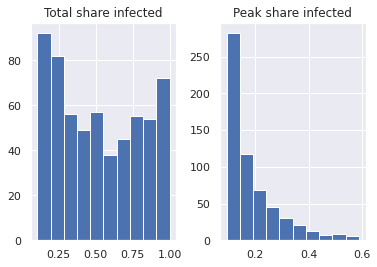

In [29]:
results.measures.hist()
plt.show()

### Sensitivity analysis

The function `sensitivity_sobol` calculates [Sobol sensitivity
indices](https://salib.readthedocs.io/en/latest/api.html#sobol-sensitivity-analysis) 
for the passed results and parameter ranges, using the 
[SAlib](https://salib.readthedocs.io/en/latest/basics.html) package. 

In [30]:
ap.sensitivity_sobol(results, param_ranges)

DataDict {
'parameters': 
    'varied': DataFrame with 4 variables and 600 rows
    'fixed': Dictionary with 2 keys
'log': Dictionary with 5 keys
'measures': DataFrame with 2 variables and 600 rows
'sensitivity': DataFrame with 2 variables and 8 rows
'sensitivity_conf': DataFrame with 2 variables and 8 rows
}

This adds two new categories to our results:

- `sensitivity` returns first-order sobol sensitivity indices
- `sensitivity_conf` returns confidence ranges for the above indices

In [31]:
results.sensitivity

S1        ST
measure              parameter                             
Total share infected population          0.024290  0.029374
                     infection_chance    0.825380  0.870765
                     recovery_chance     0.044459  0.163062
                     network_randomness -0.016176  0.034485
Peak share infected  population          0.005688  0.036784
                     infection_chance    0.355858  0.563572
                     recovery_chance     0.488160  0.626512
                     network_randomness  0.046386  0.045230

We can use pandas to create a bar plot that visualizes these sensitivity indices.

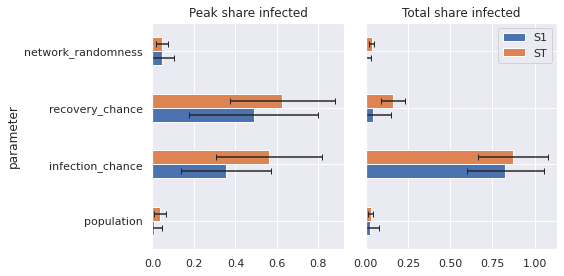

In [32]:
def plot_sobol(results):
    """ Bar plot of Sobol sensitivity indices. """
    
    sns.set()
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    si_list = results.sensitivity.groupby(by='measure')
    si_conf_list = results.sensitivity_conf.groupby(by='measure')

    for (key, si), (_, err), ax in zip(si_list, si_conf_list, axs):
        si = si.droplevel('measure')
        err = err.droplevel('measure')
        si.plot.barh(xerr=err, title=key, ax=ax, capsize = 3)
        ax.set_xlim(0)
    
    axs[0].get_legend().remove()
    axs[1].set(ylabel=None, yticklabels=[]) 
    axs[1].tick_params(left=False)
    plt.tight_layout()
    
plot_sobol(results)

Alternatively, we can also display sensitivities by plotting 
average evaluation measures over our parameter variations. 

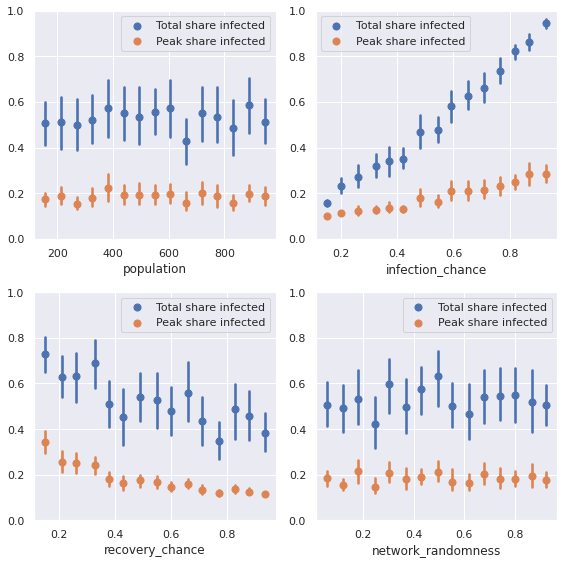

In [33]:
def plot_sensitivity(results):
    """ Show average simulation results for different parameter values. """
    
    sns.set()
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs = [i for j in axs for i in j] # Flatten list
    
    data = results.arrange_measures() 
    params = results.parameters.varied.keys() 
    
    for x, ax in zip(params, axs):
        for y in results.measures.columns:
            sns.regplot(x=x, y=y, data=data, ax=ax, ci=99, 
                        x_bins=15, fit_reg=False, label=y)  
        ax.set_ylim(0,1)
        ax.set_ylabel('')
        ax.legend()
        
    plt.tight_layout()

plot_sensitivity(results)

### Exercises

If you want to experiment with this model further, here are some things you can try to do:

- Try out different kinds of [network generators](https://networkx.org/documentation/networkx-1.10/reference/generators.html)
- Implement a different infection process
- Allow agents to be re-infected after they recovered
- Implement a fourth condition: Vaccinated
- Implement a vaccination process at each time-step
- Add a parameter 'vaccination_speed'
- Analyze the sensitivity of this parameter 

# 4. Conclusion

We have reached the end of this basic workshop on how to use the agentpy package. I hope you enjoyed it, and that everything was clear. If you have any feedback for improvements, please write to joel.foramitti@uab.cat. The project is in its early stage, and any help is very welcome. If you interested to contribute, please check out this [guide](https://agentpy.readthedocs.io/en/latest/contributing.html) and feel also free to write me.

So what is next? For more tutorials, please check out the agentpy [documentation](https://agentpy.readthedocs.io/) and [model library](https://agentpy.readthedocs.io/en/latest/model_library.html).
There you can also find some models with spatial topologies and other analysis methods such as scenario comparison and visualization with seaborn.
But the best way to learn is to start building your own models! Feel free to ask questions and share your own models in the [discussion forum](https://github.com/JoelForamitti/agentpy/discussions)
and [agentpy mailing list](https://groups.google.com/g/agentpy).